In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import requests
from bs4 import BeautifulSoup

In [31]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [32]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [46]:
df = pd.read_csv('테슬라 총합 재무제표.csv', index_col=0)
df

,date,tesla,tesla_거래량,tesla_volatility,elec_fee,oil_price,oil_price_volatility,carbon_credits,carbon_credits_volatility,EVE종가,...,매출원가,매출총이익,영업이익,순이익,자산총계,매출총이익률,영업이익률,주당순이익EPS(달러),주가수익배수PER(배),총자산이익률ROA(%)
0,2015-01-02,43.86,23820.0,-1.39,6.67,52.69,-3.44,7.01,-3.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,42.02,26840.0,-4.20,6.67,50.04,-5.03,6.90,-1.57,13.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,42.26,31310.0,0.57,6.67,47.93,-4.22,6.77,-1.88,13.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,42.19,14840.0,-0.17,6.67,48.65,1.50,6.78,0.15,13.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,42.12,17210.0,-0.17,6.67,48.79,0.29,6.81,0.44,13.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2022-02-28,870.43,32770.0,7.48,7.16,95.72,4.51,82.65,-5.83,89.50,...,40217.0,13606.0,6523.0,5519.0,62131.0,25.279156,12.119354,4.9,192.3,9.7
1823,2022-03-01,864.37,24720.0,-0.70,7.16,103.41,8.03,69.74,-15.62,86.90,...,40217.0,13606.0,6523.0,5519.0,62131.0,25.279156,12.119354,4.9,192.3,9.7
1824,2022-03-02,879.89,24650.0,1.80,7.16,110.60,6.95,67.72,-2.90,84.23,...,40217.0,13606.0,6523.0,5519.0,62131.0,25.279156,12.119354,4.9,192.3,9.7
1825,2022-03-03,839.29,20260.0,-4.61,7.16,107.67,-2.65,67.01,-1.05,79.51,...,40217.0,13606.0,6523.0,5519.0,62131.0,25.279156,12.119354,4.9,192.3,9.7


In [47]:
# df.date = pd.to_datetime(df.date)

In [48]:
new_df = df.iloc[1027:]

In [49]:
new_df = new_df.interpolate()

In [50]:
new_df

,date,tesla,tesla_거래량,tesla_volatility,elec_fee,oil_price,oil_price_volatility,carbon_credits,carbon_credits_volatility,EVE종가,...,매출원가,매출총이익,영업이익,순이익,자산총계,매출총이익률,영업이익률,주당순이익EPS(달러),주가수익배수PER(배),총자산이익률ROA(%)
1027,2019-01-02,62.02,58290.0,-6.82,6.58,46.54,1.42,26.57,1.03,8.37,...,17441.711111,4044.444444,-386.333333,-975.844444,29721.622222,18.824013,-1.798541,-1.14,-58.367778,-3.397778
1028,2019-01-03,60.07,34830.0,-3.14,6.58,47.09,1.18,24.52,-7.72,8.44,...,17453.066667,4045.666667,-385.500000,-975.766667,29712.433333,18.818938,-1.793846,-1.14,-58.271667,-3.396667
1029,2019-01-04,63.54,36970.0,5.78,6.58,47.96,1.85,24.90,1.55,8.38,...,17464.422222,4046.888889,-384.666667,-975.688889,29703.244444,18.813862,-1.789151,-1.14,-58.175556,-3.395556
1030,2019-01-07,66.99,37760.0,5.43,6.58,48.52,1.17,23.44,-5.86,8.50,...,17498.488889,4050.555556,-382.166667,-975.455556,29675.677778,18.798636,-1.775066,-1.14,-57.887222,-3.392222
1031,2019-01-08,67.07,35040.0,0.12,6.58,49.78,2.60,24.00,2.39,9.23,...,17509.844444,4051.777778,-381.333333,-975.377778,29666.488889,18.793561,-1.770371,-1.14,-57.791111,-3.391111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2022-02-28,870.43,32770.0,7.48,7.16,95.72,4.51,82.65,-5.83,89.50,...,40217.000000,13606.000000,6523.000000,5519.000000,62131.000000,25.279156,12.119354,4.90,192.300000,9.700000
1823,2022-03-01,864.37,24720.0,-0.70,7.16,103.41,8.03,69.74,-15.62,86.90,...,40217.000000,13606.000000,6523.000000,5519.000000,62131.000000,25.279156,12.119354,4.90,192.300000,9.700000
1824,2022-03-02,879.89,24650.0,1.80,7.16,110.60,6.95,67.72,-2.90,84.23,...,40217.000000,13606.000000,6523.000000,5519.000000,62131.000000,25.279156,12.119354,4.90,192.300000,9.700000
1825,2022-03-03,839.29,20260.0,-4.61,7.16,107.67,-2.65,67.01,-1.05,79.51,...,40217.000000,13606.000000,6523.000000,5519.000000,62131.000000,25.279156,12.119354,4.90,192.300000,9.700000


In [51]:
new_df.tesla = new_df.tesla.shift(-3)
new_df.dropna(inplace=True)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoost

In [53]:
new_df.columns

Index(['date', 'tesla', 'tesla_거래량', 'tesla_volatility', 'elec_fee',
       'oil_price', 'oil_price_volatility', 'carbon_credits',
       'carbon_credits_volatility', 'EVE종가', 'EVE거래량', 'EVE변동률', 'BYD종가',
       'BYD거래량', 'BYD변동률', 'DRIV종가', 'DRIV거래량', 'ACDC종가', 'ACDC거래량', 'kars',
       'kars_거래량', 'kars_volatility', 'batt', 'batt_거래량', 'batt_volatility',
       'PSI종가', 'PSI거래량', 'SOXX종가', 'SOXX거래량', 'SOXL종가', 'SOXL거래량', 'LIT조정종가',
       'LIT거래량', 'SGL종가', 'SGL변동률', 'li_price', 'co', 'co_volatility', '희토류가격',
       'nasdaq', 'nasdaq_거래량', 'nasdaq_volatility', 'ssec', 'ssec_거래량',
       'ssec_volatility', 'dollar', 'dollar_volatility', 'alu_price',
       'alu_vol', 'alu_change', 'cu_price', 'cu_change', 'REGI_price',
       'REGI_vol', 'REGI_change', 'snp_500', 'snp_500_volatility', 'kodex',
       'kodex_거래량', 'kodex_volatility', 'tiger', 'tiger_거래량',
       'tiger_volatility', 'tbx', 'tbx_거래량', 'tbx_volatility', '검색량', '매출액',
       '매출원가', '매출총이익', '영업이익', '순이익', '자산총계', '매출총이익률

In [27]:
y = new_df.tesla
x = new_df.drop(['date', 'tesla', 'snp_500', 'snp_500_volatility','매출액',
       '매출원가', '매출총이익', '영업이익', '순이익', '자산총계', '매출총이익률', '영업이익률',
       '주당순이익EPS(달러)', '주가수익배수PER(배)', '총자산이익률ROA(%)'], axis = 1)

KeyError: "['snp_500' 'snp_500_volatility'] not found in axis"

In [662]:
x_train, x_test, y_train, y_test = x.iloc[:560], x.iloc[560:], y[:560], y[560:]

In [663]:
lr = LinearRegression()

In [664]:
lr.fit(x_train, y_train)

LinearRegression()

In [665]:
preds = lr.predict(x_test)

In [666]:
r2_score(y_test, preds)

0.06579241929772428

In [667]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [668]:
print('MSE :', mean_squared_error(y_test, preds))
print('RMSE :', np.sqrt(mean_squared_error(y_test, preds)))
print('MAE :', mean_absolute_error(y_test, preds))

MSE : 28619.81680463053
RMSE : 169.1739247184108
MAE : 146.97649689910514


<AxesSubplot:>

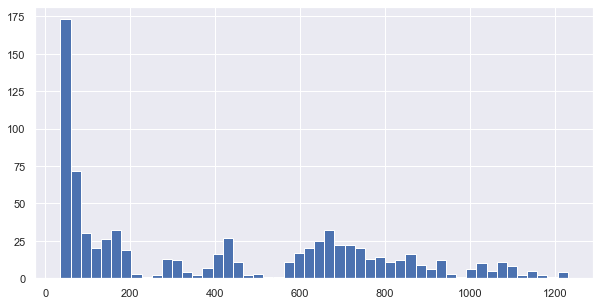

In [669]:
y.hist(bins=50, figsize=(10,5)) 

In [670]:
scaled = StandardScaler()
scaled.fit(x_train)
x_train_scaled = scaled.transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [671]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
preds_lr = lr.predict(x_test_scaled)
print('train :', lr.score(x_train_scaled,y_train))
print('test :', lr.score(x_test_scaled,y_test))

train : 0.9916011390722994
test : 0.06579241931974034


In [689]:
Ridge

train_score = []
test_score = []
alpha_list = list(np.arange(0.01, 1000, 0.01))

for alpha in alpha_list:
    rid = Ridge(alpha=alpha)
    rid.fit(x_train_scaled, y_train)
    train_score.append(rid.score(x_train_scaled, y_train))
    test_score.append(rid.score(x_test_scaled, y_test))
    preds_rid = rid.predict(x_test_scaled)
print(train_score)
print(test_score)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [673]:
preds_rid

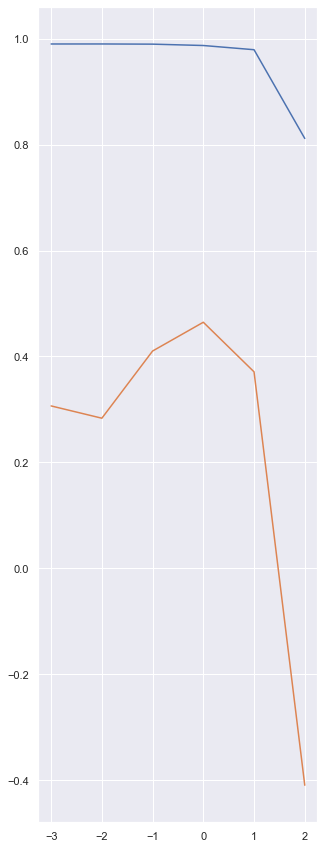

In [674]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [675]:
# Lasso

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    las = Lasso(alpha=alpha)
    las.fit(x_train_scaled, y_train)
    train_score.append(las.score(x_train_scaled, y_train))
    test_score.append(las.score(x_test_scaled, y_test))
    preds_las = las.predict(x_test_scaled)
print(train_score)
print(test_score)

[0.9914845796994419, 0.9914693260827733, 0.9908856201734755, 0.9876731823253445, 0.9796110216210592, 0.7896390008818883]
[0.011323141675789627, 0.00854283366258346, 0.15806252306142365, 0.4588540589715231, 0.42741810061590635, -0.5115468239277701]


C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134140.36879145165, tolerance: 3247.782498815554
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91578.07888365872, tolerance: 3247.782498815554
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7363.264206958935, tolerance: 3247.782498815554
  model = cd_fast.enet_coordinate_descent(


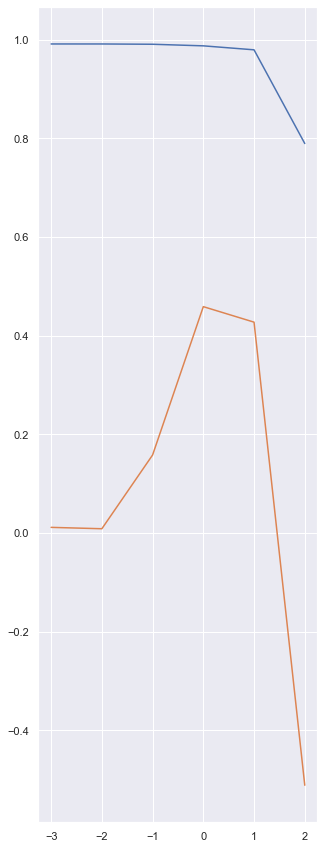

In [676]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (197,) and (237,)

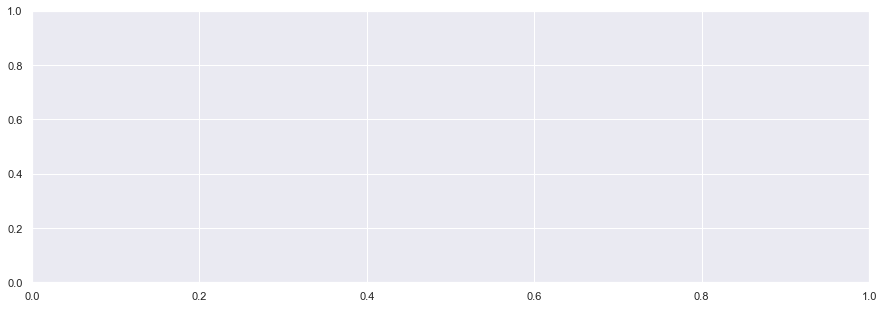

In [677]:
sns.set(rc={'figure.figsize':(15,5)})
plt.plot(y_test.index, y_test,'r--', range(1627,1824),preds,'b--' )

In [678]:
coef_df = pd.DataFrame(las.coef_, index = x_train.columns)
coef_df = coef_df.sort_values(0, ascending=False)

<AxesSubplot:xlabel='0'>

C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 55148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53664 mi

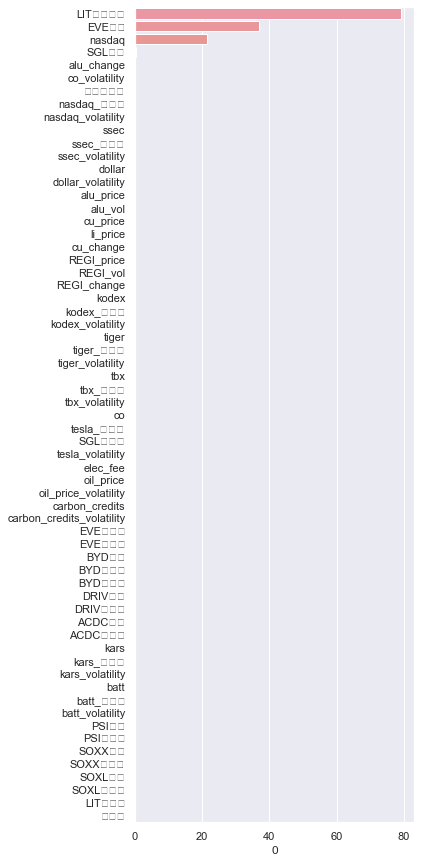

In [679]:
plt.rcParams['font.family'] = 'Nanum Brush Script'
sns.set(rc = {'figure.figsize':(5,15)})
sns.barplot(x=coef_df[0].sort_values(ascending=False), y=coef_df.index)

In [680]:
xb = XGBRegressor()
xb.fit(x_train_scaled, y_train)
preds_xb = xb.predict(x_test_scaled)
print('train :', xb.score(x_train_scaled,y_train))
print('test :', xb.score(x_test_scaled,y_test))

train : 0.9999999959807856
test : -0.500772673850961


In [681]:
lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled, y_train)
preds_lgbm = lgbm.predict(x_test_scaled)
print('train :', lgbm.score(x_train_scaled,y_train))
print('test :', lgbm.score(x_test_scaled,y_test))

train : 0.999669932000235
test : -0.15723194747766467


In [682]:
cat = CatBoost()
cat.fit(x_train_scaled, y_train)
preds_cat = cat.predict(x_test_scaled)
r2_score(y_test,preds_cat)
# print('train :', cat.score(x_train_scaled,y_train))
# print('test :', cat.score(x_test_scaled,y_test))

Learning rate set to 0.037359
0:	learn: 233.1443865	total: 5.4ms	remaining: 5.39s
1:	learn: 225.6250105	total: 9.81ms	remaining: 4.89s
2:	learn: 218.2590983	total: 14.2ms	remaining: 4.71s
3:	learn: 211.0024504	total: 18.6ms	remaining: 4.63s
4:	learn: 204.8136018	total: 23.2ms	remaining: 4.63s
5:	learn: 198.3045985	total: 27.7ms	remaining: 4.58s
6:	learn: 191.8253893	total: 32.2ms	remaining: 4.56s
7:	learn: 185.9321089	total: 36.6ms	remaining: 4.54s
8:	learn: 180.1945852	total: 41.3ms	remaining: 4.55s
9:	learn: 174.2394917	total: 46ms	remaining: 4.56s
10:	learn: 168.7522151	total: 50.4ms	remaining: 4.53s
11:	learn: 163.6790661	total: 54.9ms	remaining: 4.52s
12:	learn: 158.8405376	total: 59.4ms	remaining: 4.51s
13:	learn: 153.8339787	total: 64.1ms	remaining: 4.51s
14:	learn: 149.0906608	total: 68.8ms	remaining: 4.52s
15:	learn: 144.6506243	total: 73.2ms	remaining: 4.5s
16:	learn: 139.9264481	total: 77.9ms	remaining: 4.5s
17:	learn: 135.5668645	total: 82.3ms	remaining: 4.49s
18:	learn: 13

156:	learn: 14.1176067	total: 736ms	remaining: 3.95s
157:	learn: 14.0381765	total: 741ms	remaining: 3.95s
158:	learn: 13.9824066	total: 746ms	remaining: 3.94s
159:	learn: 13.9246755	total: 750ms	remaining: 3.94s
160:	learn: 13.8746765	total: 756ms	remaining: 3.94s
161:	learn: 13.8002253	total: 761ms	remaining: 3.94s
162:	learn: 13.7496714	total: 766ms	remaining: 3.93s
163:	learn: 13.6852097	total: 771ms	remaining: 3.93s
164:	learn: 13.6414690	total: 775ms	remaining: 3.92s
165:	learn: 13.5707550	total: 780ms	remaining: 3.92s
166:	learn: 13.4974642	total: 785ms	remaining: 3.92s
167:	learn: 13.4561398	total: 790ms	remaining: 3.91s
168:	learn: 13.4191539	total: 795ms	remaining: 3.91s
169:	learn: 13.3234257	total: 800ms	remaining: 3.91s
170:	learn: 13.2631257	total: 805ms	remaining: 3.9s
171:	learn: 13.2211014	total: 810ms	remaining: 3.9s
172:	learn: 13.1605077	total: 815ms	remaining: 3.9s
173:	learn: 13.1042807	total: 820ms	remaining: 3.89s
174:	learn: 13.0559474	total: 825ms	remaining: 3.

346:	learn: 6.7740771	total: 1.65s	remaining: 3.1s
347:	learn: 6.7450398	total: 1.65s	remaining: 3.09s
348:	learn: 6.7384002	total: 1.66s	remaining: 3.09s
349:	learn: 6.7282015	total: 1.66s	remaining: 3.08s
350:	learn: 6.7138485	total: 1.67s	remaining: 3.08s
351:	learn: 6.6944388	total: 1.67s	remaining: 3.08s
352:	learn: 6.6764114	total: 1.68s	remaining: 3.07s
353:	learn: 6.6378049	total: 1.68s	remaining: 3.07s
354:	learn: 6.6108639	total: 1.69s	remaining: 3.06s
355:	learn: 6.5873243	total: 1.69s	remaining: 3.06s
356:	learn: 6.5668879	total: 1.7s	remaining: 3.05s
357:	learn: 6.5420790	total: 1.7s	remaining: 3.05s
358:	learn: 6.5256269	total: 1.7s	remaining: 3.04s
359:	learn: 6.4904200	total: 1.71s	remaining: 3.04s
360:	learn: 6.4641485	total: 1.71s	remaining: 3.03s
361:	learn: 6.4434917	total: 1.72s	remaining: 3.03s
362:	learn: 6.4172487	total: 1.72s	remaining: 3.02s
363:	learn: 6.3999611	total: 1.73s	remaining: 3.02s
364:	learn: 6.3891580	total: 1.73s	remaining: 3.02s
365:	learn: 6.35

534:	learn: 3.8791050	total: 2.56s	remaining: 2.22s
535:	learn: 3.8737388	total: 2.56s	remaining: 2.22s
536:	learn: 3.8697105	total: 2.57s	remaining: 2.22s
537:	learn: 3.8587847	total: 2.58s	remaining: 2.21s
538:	learn: 3.8443649	total: 2.58s	remaining: 2.21s
539:	learn: 3.8370266	total: 2.58s	remaining: 2.2s
540:	learn: 3.8274463	total: 2.59s	remaining: 2.2s
541:	learn: 3.8183242	total: 2.6s	remaining: 2.19s
542:	learn: 3.8161792	total: 2.6s	remaining: 2.19s
543:	learn: 3.8003581	total: 2.6s	remaining: 2.18s
544:	learn: 3.7975962	total: 2.61s	remaining: 2.18s
545:	learn: 3.7798373	total: 2.62s	remaining: 2.17s
546:	learn: 3.7731868	total: 2.62s	remaining: 2.17s
547:	learn: 3.7678612	total: 2.62s	remaining: 2.16s
548:	learn: 3.7591500	total: 2.63s	remaining: 2.16s
549:	learn: 3.7477959	total: 2.63s	remaining: 2.15s
550:	learn: 3.7399456	total: 2.64s	remaining: 2.15s
551:	learn: 3.7274883	total: 2.64s	remaining: 2.15s
552:	learn: 3.7150360	total: 2.65s	remaining: 2.14s
553:	learn: 3.703

724:	learn: 2.2203016	total: 3.47s	remaining: 1.32s
725:	learn: 2.2165230	total: 3.48s	remaining: 1.31s
726:	learn: 2.2070647	total: 3.48s	remaining: 1.31s
727:	learn: 2.2022500	total: 3.49s	remaining: 1.3s
728:	learn: 2.1940402	total: 3.49s	remaining: 1.3s
729:	learn: 2.1934286	total: 3.5s	remaining: 1.29s
730:	learn: 2.1920444	total: 3.5s	remaining: 1.29s
731:	learn: 2.1901616	total: 3.51s	remaining: 1.28s
732:	learn: 2.1830279	total: 3.51s	remaining: 1.28s
733:	learn: 2.1756543	total: 3.52s	remaining: 1.27s
734:	learn: 2.1667347	total: 3.52s	remaining: 1.27s
735:	learn: 2.1587247	total: 3.53s	remaining: 1.26s
736:	learn: 2.1537405	total: 3.53s	remaining: 1.26s
737:	learn: 2.1447617	total: 3.54s	remaining: 1.25s
738:	learn: 2.1403474	total: 3.54s	remaining: 1.25s
739:	learn: 2.1348230	total: 3.54s	remaining: 1.25s
740:	learn: 2.1296272	total: 3.55s	remaining: 1.24s
741:	learn: 2.1246219	total: 3.55s	remaining: 1.24s
742:	learn: 2.1167714	total: 3.56s	remaining: 1.23s
743:	learn: 2.11

903:	learn: 1.3923518	total: 4.39s	remaining: 466ms
904:	learn: 1.3917625	total: 4.39s	remaining: 461ms
905:	learn: 1.3859128	total: 4.4s	remaining: 456ms
906:	learn: 1.3845635	total: 4.4s	remaining: 451ms
907:	learn: 1.3795667	total: 4.41s	remaining: 446ms
908:	learn: 1.3771610	total: 4.41s	remaining: 442ms
909:	learn: 1.3765079	total: 4.42s	remaining: 437ms
910:	learn: 1.3750615	total: 4.42s	remaining: 432ms
911:	learn: 1.3706864	total: 4.42s	remaining: 427ms
912:	learn: 1.3689632	total: 4.43s	remaining: 422ms
913:	learn: 1.3685592	total: 4.43s	remaining: 417ms
914:	learn: 1.3665865	total: 4.44s	remaining: 412ms
915:	learn: 1.3648282	total: 4.44s	remaining: 408ms
916:	learn: 1.3625050	total: 4.45s	remaining: 403ms
917:	learn: 1.3577089	total: 4.45s	remaining: 398ms
918:	learn: 1.3520446	total: 4.46s	remaining: 393ms
919:	learn: 1.3478961	total: 4.46s	remaining: 388ms
920:	learn: 1.3449711	total: 4.47s	remaining: 383ms
921:	learn: 1.3416232	total: 4.47s	remaining: 378ms
922:	learn: 1.

-1.007795923988129

In [683]:
y_log = np.log1p(y)
# log1p(n) = log(n+1) : 값이 0일때 error를 해결하기 위해
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

<AxesSubplot:>

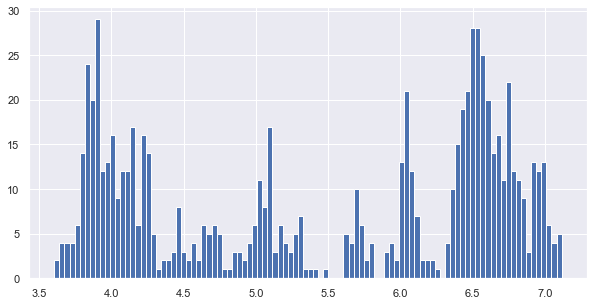

In [684]:
y_log.hist(bins=100, figsize=(10,5))

In [685]:
lr = LinearRegression()
rid = Ridge()
las = Lasso(alpha=0.0001)

lr.fit(x_train_scaled, y_train_log)
rid.fit(x_train_scaled, y_train_log)
las.fit(x_train_scaled, y_train_log)

preds_lr = lr.predict(x_test_scaled)
preds_rid = rid.predict(x_test_scaled)
preds_las = las.predict(x_test_scaled)

# exponential을 통해 log원복
preds_lr_exp = np.expm1(preds_lr)
preds_rid_exp = np.expm1(preds_rid)
preds_las_exp = np.expm1(preds_las)

# log를 취해 쏠린 label값을 조정해 준 것이 오차가 더 작다.
print('r2_score_lr :', r2_score(y_test, preds_lr_exp))
print('r2_score_rid :', r2_score(y_test, preds_rid_exp))
print('r2_score_las :', r2_score(y_test, preds_las_exp))

r2_score_lr : -12.366982716422891
r2_score_rid : -10.762644161732354
r2_score_las : -12.310788966802747


C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5211535209140834, tolerance: 0.05649826273291591
  model = cd_fast.enet_coordinate_descent(


In [686]:
# ElasticNet

from sklearn.linear_model import ElasticNet

In [687]:
el= ElasticNet(alpha=13, l1_ratio=0.3)

In [688]:
el.fit(x_train_scaled, y_train)
preds_el = el.predict(x_test_scaled)
print(el.score(x_train_scaled, y_train))
print(el.score(x_test_scaled, y_test))

0.8683703520980419
-0.5606038498434622


In [657]:
from sklearn.model_selection import GridSearchCV

ell = ElasticNet()

In [658]:
params = {'alpha' : list(np.arange(0.01, 100, 0.01)), 'l1_ratio' : list(np.arange(0, 1, 0.01))}

In [659]:
grid = GridSearchCV(ell, param_grid=params, refit = True, verbose = True)

In [660]:
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 999900 candidates, totalling 4999500 fits


C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224423.61207140808, tolerance: 3300.3146958024795
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240840.05666442198, tolerance: 3304.3447116523125
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204846.612190008, tolerance: 3693.0873432364792
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219477.53244665993, tolerance: 3300.3146958024795
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235548.01017139907, tolerance: 3304.3447116523125
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200306.47093164697, tolerance: 3693.0873432364792
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Con

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196705.90777084522, tolerance: 3693.0873432364792
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123800.83221714314, tolerance: 3689.269935577313
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212162.89532950605, tolerance: 3300.3146958024795
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conv

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207510.21683401044, tolerance: 3300.3146958024795
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223600.90310098714, tolerance: 3304.3447116523125
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192580.62724428292, tolerance: 3693.0873432364792
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Con

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117627.19199017208, tolerance: 3689.269935577313
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1178.8315253202454, tolerance: 916.3270402396666
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204358.75758640943, tolerance: 3300.3146958024795
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1714.190835848567, tolerance: 916.3270402396666
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201255.44653399798, tolerance: 3300.3146958024795
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219245.87090270815, tolerance: 3304.3447116523125
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198214.91195095083, tolerance: 3300.3146958024795
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216054.5573684166, tolerance: 3304.3447116523125
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183468.46479598398, tolerance: 3693.0873432364792
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conv

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212240.58709927357, tolerance: 3304.3447116523125
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179171.24537651768, tolerance: 3693.0873432364792
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109620.71155608475, tolerance: 3689.269935577313
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conv

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187633.23422355283, tolerance: 3300.3146958024795
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206121.27699606007, tolerance: 3304.3447116523125
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172605.1930825603, tolerance: 3693.0873432364792
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conv

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5436.168821097017, tolerance: 916.3270402396666
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180569.67890088278, tolerance: 3300.3146958024795
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198255.7467400622, tolerance: 3304.3447116523125
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151004.51233300933, tolerance: 3693.0873432364792
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102653.23496175472, tolerance: 3689.269935577313
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9253.85531750819, tolerance: 916.3270402396666
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99969.4296066231, tolerance: 3689.269935577313
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7434.6775258947455, tolerance: 916.3270402396666
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147120.96345212797, tolerance: 3300.3146958024795
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6982.205343838461, tolerance: 916.3270402396666
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159938.94428676585, tolerance: 3300.3146958024795
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185869.65689498762, tolerance: 3304.3447116523125
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184290.68797414764, tolerance: 3304.3447116523125
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156441.15405242503, tolerance: 3693.0873432364792
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91743.2831018796, tolerance: 3689.269935577313
  model = cd_fast.enet_coordinate_descent(
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [661]:
# r2 score

from sklearn.metrics import r2_score

print(r2_score(y_test, preds_el))

-0.5528854548846358


In [ ]:
preds_el

In [ ]:
coef_df.index